In [1]:
import data_load
import clustering_model
%load_ext autoreload
%autoreload 2

# Data Load

In [2]:
basic_data = data_load.load_basic_data()
print(basic_data.shape)
basic_data.head()

(211, 18)


,id,name,symbol,slug,tags,cmcRank,marketPairCount,circulatingSupply,selfReportedCirculatingSupply,totalSupply,maxSupply,isActive,lastUpdated,dateAdded,quotes,isAudited,auditInfoList,platform
0,1,Bitcoin,BTC,bitcoin,"['mineable', 'pow', 'sha-256', 'store-of-value...",1,10440,1.947497e+07,0.0,1.947497e+07,2.100000e+07,1,2023-09-03T07:42:00.000Z,2010-07-13T00:00:00.000Z,"[{'name': 'USD', 'price': 25925.273786295238, ...",False,NaN,NaN
1,1027,Ethereum,ETH,ethereum,"['pos', 'smart-contracts', 'ethereum-ecosystem...",2,7323,1.202167e+08,0.0,1.202167e+08,NaN,1,2023-09-03T07:42:00.000Z,2015-08-07T00:00:00.000Z,"[{'name': 'USD', 'price': 1634.7057133599972, ...",False,[],NaN
2,825,Tether USDt,USDT,tether,"['payments', 'stablecoin', 'asset-backed-stabl...",3,61254,8.290017e+10,0.0,8.543720e+10,NaN,1,2023-09-03T07:42:00.000Z,2015-02-25T00:00:00.000Z,"[{'name': 'USD', 'price': 0.9998534852373653, ...",True,"[{'coinId': '825', 'auditor': 'CertiK', 'audit...","{'id': 1, 'name': 'Ethereum', 'symbol': 'ETH',..."
3,1839,BNB,BNB,bnb,"['marketplace', 'centralized-exchange', 'payme...",4,1604,1.538501e+08,0.0,1.538501e+08,NaN,1,2023-09-03T07:42:00.000Z,2017-07-25T00:00:00.000Z,"[{'name': 'USD', 'price': 214.30909936975263, ...",True,"[{'coinId': '1839', 'auditor': 'CertiK', 'audi...",NaN
4,52,XRP,XRP,xrp,"['medium-of-exchange', 'enterprise-solutions',...",5,1060,5.297770e+10,0.0,9.998846e+10,1.000000e+11,1,2023-09-03T07:42:00.000Z,2013-08-04T00:00:00.000Z,"[{'name': 'USD', 'price': 0.5035322404906508, ...",True,"[{'coinId': '52', 'auditor': 'CertiK', 'auditS...",NaN


In [3]:
historical_data = data_load.load_historical_data(basic_data)
print(historical_data.shape)
historical_data.head()

(356049, 10)


,symbol,date,open,high,low,close,avg,return,volume,marketcap
0,BTC,2023-09-02,25800.909609,25970.284489,25753.093847,25868.798140,25834.853875,0.002631,1.010039e+10,5.037864e+11
1,BTC,2023-09-01,25934.020806,26125.869774,25362.609128,25800.724373,25867.372589,-0.005140,1.720286e+10,5.024359e+11
2,BTC,2023-08-31,27301.929317,27456.079001,25752.929947,25931.472893,26616.701105,-0.050196,2.018100e+10,5.049576e+11
3,BTC,2023-08-30,27726.084034,27760.159397,27069.207425,27297.265348,27511.674691,-0.015466,1.634366e+10,5.315289e+11
4,BTC,2023-08-29,26102.485832,28089.338027,25912.628909,27727.393009,26914.939421,0.062251,2.936839e+10,5.398825e+11


# Clustering Model

In [4]:
return_data = clustering_model.load_return_data(historical_data)
print(return_data.shape)
return_data.head()

(730, 192)


,1INCH,AAVE,ABBC,ACH,ADA,AGIX,AKRO,AKT,ALGO,ALPHA,...,XMR,XNO,XRP,XTZ,YFI,ZEC,ZEN,ZIL,ZRX,stETH
0,0.066969,-0.011682,-0.001541,-0.028551,0.003016,-0.007777,0.032577,0.006589,0.065648,0.019097,...,0.003223,0.012289,0.029739,0.003315,0.045645,0.037548,0.136498,0.048381,0.050591,0.067193
1,0.031380,0.008203,-0.004544,-0.051257,-0.045032,0.007378,0.025833,0.032898,-0.009172,-0.031921,...,0.005190,-0.004155,-0.027057,0.017690,0.027426,0.025503,-0.017012,0.023077,0.058085,-0.008172
2,0.040978,0.047683,-0.011046,0.033794,0.028042,0.221943,0.040096,0.042651,0.089519,0.038943,...,0.032691,0.080031,0.040129,0.029603,0.034697,0.078248,0.048369,0.086111,0.052986,0.020878
3,-0.033027,-0.020038,-0.004989,0.081533,-0.027368,-0.097676,0.032446,0.000434,0.116932,0.012984,...,-0.002175,0.005432,0.062798,0.004693,-0.017332,-0.010743,-0.022217,-0.014056,-0.018141,-0.010733
4,-0.214129,-0.155347,-0.080104,-0.147611,-0.116604,-0.163703,-0.264117,-0.097715,-0.133944,-0.184555,...,-0.167616,-0.193790,-0.190249,-0.214974,-0.182457,-0.206245,-0.226603,-0.223396,-0.215557,-0.154642


In [5]:
clusters_data = clustering_model.load_clusters_data(return_data)
print(clusters_data['cluster'].unique().shape)
clusters_data.head()

(55,)


,symbol,cluster
0,ABBC,0
1,ACH,1
2,AKRO,2
3,AMP,3
4,API3,4


# Regression Model

In [6]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score

In [7]:
days = 30  #TODO: add to config

In [8]:
clusters_data['cluster'] = clusters_data['cluster'].map('{:02}'.format)
clusters_data

,symbol,cluster
0,ABBC,00
1,ACH,01
2,AKRO,02
3,AMP,03
4,API3,04
...,...,...
187,ZRX,51
188,WEMIX,52
189,XDC,53
190,XLM,54


In [9]:
regression_data = historical_data.merge(  # historical_data[historical_data['symbol'] == 'BTC']
    clusters_data,
    on='symbol',
    how='inner'
)

regression_data

,symbol,date,open,high,low,close,avg,return,volume,marketcap,cluster
0,BTC,2023-09-02,25800.909609,25970.284489,25753.093847,25868.798140,25834.853875,0.002631,1.010039e+10,5.037864e+11,07
1,BTC,2023-09-01,25934.020806,26125.869774,25362.609128,25800.724373,25867.372589,-0.005140,1.720286e+10,5.024359e+11,07
2,BTC,2023-08-31,27301.929317,27456.079001,25752.929947,25931.472893,26616.701105,-0.050196,2.018100e+10,5.049576e+11,07
3,BTC,2023-08-30,27726.084034,27760.159397,27069.207425,27297.265348,27511.674691,-0.015466,1.634366e+10,5.315289e+11,07
4,BTC,2023-08-29,26102.485832,28089.338027,25912.628909,27727.393009,26914.939421,0.062251,2.936839e+10,5.398825e+11,07
...,...,...,...,...,...,...,...,...,...,...,...
332165,DENT,2017-08-16,0.000843,0.000909,0.000659,0.000799,0.000821,-0.053043,5.710540e+04,8.310972e+06,51
332166,DENT,2017-08-15,0.000878,0.000918,0.000653,0.000841,0.000859,-0.041580,1.061830e+05,8.752147e+06,51
332167,DENT,2017-08-14,0.001337,0.003317,0.000651,0.000876,0.001107,-0.344490,1.268660e+05,9.118776e+06,51
332168,DENT,2017-08-13,0.000633,0.001419,0.000442,0.001179,0.000906,0.862293,2.454420e+05,1.223908e+07,51


In [10]:
regression_data['future_return'] = ((1 + regression_data['return']).rolling(window=days).apply(np.prod, raw=True) - 1).shift(1)
regression_data['future_risk'] = regression_data['return'].rolling(window=days).agg(np.var)
regression_data.loc[regression_data.groupby('symbol').cumcount() < days, ['future_return', 'future_risk']] = np.nan
regression_data.dropna(inplace=True)  # subset='future_return'
regression_data.reset_index(drop=True, inplace=True)
regression_data

,symbol,date,open,high,low,close,avg,return,volume,marketcap,cluster,future_return,future_risk
0,BTC,2023-08-03,29161.811946,29375.707028,28959.488209,29178.678780,29170.245363,0.000578,1.278036e+10,5.674461e+11,07,-0.112826,0.000448
1,BTC,2023-08-02,29704.146838,29987.997112,28946.510378,29151.959689,29428.053264,-0.018590,1.921266e+10,5.668988e+11,07,-0.114643,0.000456
2,BTC,2023-08-01,29230.872405,29675.732498,28657.023820,29675.732498,29453.302452,0.015219,1.827239e+10,5.770561e+11,07,-0.126612,0.000391
3,BTC,2023-07-31,29278.314054,29489.872869,29131.579034,29230.110879,29254.212467,-0.001646,1.165678e+10,5.683656e+11,07,-0.066460,0.000385
4,BTC,2023-07-30,29357.093643,29443.169490,29059.502629,29275.307947,29316.200795,-0.002786,8.678455e+09,5.692170e+11,07,-0.053356,0.000239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326402,DENT,2017-08-16,0.000843,0.000909,0.000659,0.000799,0.000821,-0.053043,5.710540e+04,8.310972e+06,51,-0.724398,0.055420
326403,DENT,2017-08-15,0.000878,0.000918,0.000653,0.000841,0.000859,-0.041580,1.061830e+05,8.752147e+06,51,-0.764741,0.053863
326404,DENT,2017-08-14,0.001337,0.003317,0.000651,0.000876,0.001107,-0.344490,1.268660e+05,9.118776e+06,51,-0.706562,0.057401
326405,DENT,2017-08-13,0.000633,0.001419,0.000442,0.001179,0.000906,0.862293,2.454420e+05,1.223908e+07,51,-0.812505,0.078227


In [11]:
regression_max_data = regression_data[['symbol', 'open', 'high', 'low', 'close', 'avg', 'return', 'volume', 'marketcap', 'future_return', 'future_risk']].groupby('symbol').max()
regression_max_data = regression_data[['symbol']].merge(
    regression_max_data,
    on='symbol',
    how='left'
)
regression_max_data

,symbol,open,high,low,close,avg,return,volume,marketcap,future_return,future_risk
0,BTC,67549.735581,68789.625939,66382.061008,67566.830088,67260.781839,0.416811,3.509679e+11,1.274831e+12,4.388445,0.017703
1,BTC,67549.735581,68789.625939,66382.061008,67566.830088,67260.781839,0.416811,3.509679e+11,1.274831e+12,4.388445,0.017703
2,BTC,67549.735581,68789.625939,66382.061008,67566.830088,67260.781839,0.416811,3.509679e+11,1.274831e+12,4.388445,0.017703
3,BTC,67549.735581,68789.625939,66382.061008,67566.830088,67260.781839,0.416811,3.509679e+11,1.274831e+12,4.388445,0.017703
4,BTC,67549.735581,68789.625939,66382.061008,67566.830088,67260.781839,0.416811,3.509679e+11,1.274831e+12,4.388445,0.017703
...,...,...,...,...,...,...,...,...,...,...,...
326402,DENT,0.098446,0.111397,0.077530,0.098937,0.090250,1.568128,1.309384e+09,1.815727e+09,79.589904,0.183508
326403,DENT,0.098446,0.111397,0.077530,0.098937,0.090250,1.568128,1.309384e+09,1.815727e+09,79.589904,0.183508
326404,DENT,0.098446,0.111397,0.077530,0.098937,0.090250,1.568128,1.309384e+09,1.815727e+09,79.589904,0.183508
326405,DENT,0.098446,0.111397,0.077530,0.098937,0.090250,1.568128,1.309384e+09,1.815727e+09,79.589904,0.183508


In [12]:
regression_normalized_data = regression_data[['future_return', 'future_risk', 'open', 'high', 'low', 'close', 'avg', 'return', 'volume', 'marketcap']] / regression_max_data[['future_return', 'future_risk', 'open', 'high', 'low', 'close', 'avg', 'return', 'volume', 'marketcap']]
regression_normalized_data = regression_data[['symbol', 'cluster']].join(
    regression_normalized_data
)
regression_normalized_data  # TODO: add date?

,symbol,cluster,future_return,future_risk,open,high,low,close,avg,return,volume,marketcap
0,BTC,07,-0.025710,0.025326,0.431709,0.427037,0.436255,0.431849,0.433689,0.001388,0.036415,0.445115
1,BTC,07,-0.026124,0.025735,0.439737,0.435938,0.436059,0.431454,0.437522,-0.044600,0.054742,0.444685
2,BTC,07,-0.028851,0.022091,0.432731,0.431398,0.431698,0.439206,0.437897,0.036513,0.052063,0.452653
3,BTC,07,-0.015144,0.021731,0.433433,0.428697,0.438847,0.432610,0.434937,-0.003950,0.033213,0.445836
4,BTC,07,-0.012158,0.013508,0.434600,0.428018,0.437761,0.433279,0.435859,-0.006684,0.024727,0.446504
...,...,...,...,...,...,...,...,...,...,...,...,...
326402,DENT,51,-0.009102,0.302003,0.008568,0.008157,0.008498,0.008073,0.009098,-0.033826,0.000044,0.004577
326403,DENT,51,-0.009609,0.293520,0.008914,0.008243,0.008419,0.008501,0.009522,-0.026515,0.000081,0.004820
326404,DENT,51,-0.008878,0.312796,0.013580,0.029775,0.008402,0.008858,0.012262,-0.219682,0.000097,0.005022
326405,DENT,51,-0.010209,0.426288,0.006431,0.012742,0.005697,0.011917,0.010040,0.549887,0.000187,0.006741


In [13]:
regression_normalized_data = pd.get_dummies(regression_normalized_data)
regression_normalized_data

,future_return,future_risk,open,high,low,close,avg,return,volume,marketcap,...,cluster_45,cluster_46,cluster_47,cluster_48,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54
0,-0.025710,0.025326,0.431709,0.427037,0.436255,0.431849,0.433689,0.001388,0.036415,0.445115,...,False,False,False,False,False,False,False,False,False,False
1,-0.026124,0.025735,0.439737,0.435938,0.436059,0.431454,0.437522,-0.044600,0.054742,0.444685,...,False,False,False,False,False,False,False,False,False,False
2,-0.028851,0.022091,0.432731,0.431398,0.431698,0.439206,0.437897,0.036513,0.052063,0.452653,...,False,False,False,False,False,False,False,False,False,False
3,-0.015144,0.021731,0.433433,0.428697,0.438847,0.432610,0.434937,-0.003950,0.033213,0.445836,...,False,False,False,False,False,False,False,False,False,False
4,-0.012158,0.013508,0.434600,0.428018,0.437761,0.433279,0.435859,-0.006684,0.024727,0.446504,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326402,-0.009102,0.302003,0.008568,0.008157,0.008498,0.008073,0.009098,-0.033826,0.000044,0.004577,...,False,False,False,False,False,False,True,False,False,False
326403,-0.009609,0.293520,0.008914,0.008243,0.008419,0.008501,0.009522,-0.026515,0.000081,0.004820,...,False,False,False,False,False,False,True,False,False,False
326404,-0.008878,0.312796,0.013580,0.029775,0.008402,0.008858,0.012262,-0.219682,0.000097,0.005022,...,False,False,False,False,False,False,True,False,False,False
326405,-0.010209,0.426288,0.006431,0.012742,0.005697,0.011917,0.010040,0.549887,0.000187,0.006741,...,False,False,False,False,False,False,True,False,False,False


In [19]:
regr = linear_model.LinearRegression()
x = regression_normalized_data.loc[:, 'open':]
y = regression_normalized_data[['future_return', 'future_risk']]

regr.fit(x, y)
y_ = regr.predict(x)

print(f'RSQ: {(100 * r2_score(y, y_)):.2f}%')

RSQ: 13.28%


<Axes: xlabel='close', ylabel='future_return'>

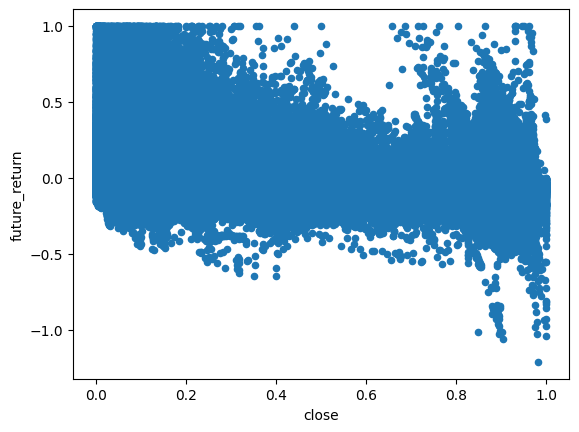

In [18]:
regression_normalized_data.plot.scatter(x='close', y='future_return')